## Initialisation

In [1]:
import sys

if "src" not in sys.path:
    sys.path.insert(0, "src")

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


from typing import Set, Dict, List, Tuple
from collections import defaultdict
from joinbench.benchmark_data import BenchmarkData
from joinbench.benchmark_group import BenchmarkGroup
from joinbench.benchmark_plotter import BenchmarkPlotter
from joinbench.evaluation_method_plotter import EvaluationMethodPlotter
from joinbench.benchmark_group_plotter import BenchmarkGroupPlotter

In [3]:
matplotlib.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'figure.figsize': [6, 4],
    "figure.autolayout": True,
})

In [4]:
def generate_figure_path(name: str) -> str:
    return f"../report/figures/{name.replace(' ', '-')}.pgf"

## Exploring data

In [5]:
benchmarks: BenchmarkGroup = BenchmarkGroup.load_with_counts([10, 25, 50, 100, 250, 500, 750, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000], path="../data/")
benchmark = benchmarks.get_benchmark_with_count(10000)

In [6]:
names = benchmark.get_report_names_in_order()
names

['join onePercent and onePercent/Product equijoin',
 'join onePercent and onePercent/Comprehension equijoin',
 'join onePercent and onePercent/Indexed equijoin',
 'join onePercent and twentyPercent/Product equijoin',
 'join onePercent and twentyPercent/Comprehension equijoin',
 'join onePercent and twentyPercent/Indexed equijoin',
 'join twentyPercent and onePercent/Product equijoin',
 'join twentyPercent and onePercent/Comprehension equijoin',
 'join twentyPercent and onePercent/Indexed equijoin',
 'join onePercent and fiftyPercent/Product equijoin',
 'join onePercent and fiftyPercent/Comprehension equijoin',
 'join onePercent and fiftyPercent/Indexed equijoin',
 'join evenOnePercent and oddOnePercent/Product equijoin',
 'join evenOnePercent and oddOnePercent/Comprehension equijoin',
 'join evenOnePercent and oddOnePercent/Indexed equijoin']

In [7]:
group_names = benchmark.get_benchmark_group_names()
group_names

{'join evenOnePercent and oddOnePercent',
 'join onePercent and fiftyPercent',
 'join onePercent and onePercent',
 'join onePercent and twentyPercent',
 'join twentyPercent and onePercent'}

In [8]:
group_map = benchmark.map_benchmark_groups_and_benchmark_indices()
group_map

defaultdict(list,
            {'join onePercent and onePercent': [(0, 'Product equijoin'),
              (1, 'Comprehension equijoin'),
              (2, 'Indexed equijoin')],
             'join onePercent and twentyPercent': [(3, 'Product equijoin'),
              (4, 'Comprehension equijoin'),
              (5, 'Indexed equijoin')],
             'join twentyPercent and onePercent': [(6, 'Product equijoin'),
              (7, 'Comprehension equijoin'),
              (8, 'Indexed equijoin')],
             'join onePercent and fiftyPercent': [(9, 'Product equijoin'),
              (10, 'Comprehension equijoin'),
              (11, 'Indexed equijoin')],
             'join evenOnePercent and oddOnePercent': [(12,
               'Product equijoin'),
              (13, 'Comprehension equijoin'),
              (14, 'Indexed equijoin')]})

In [9]:
benchmark.get_benchmark_mean_from_index(0)

1.71526960764586

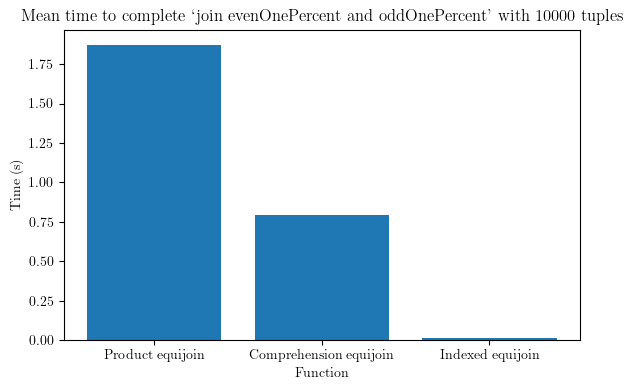

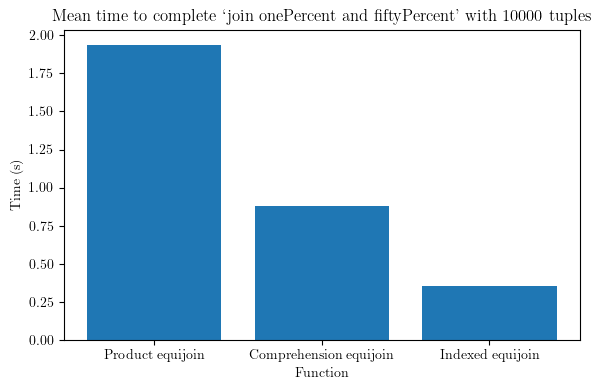

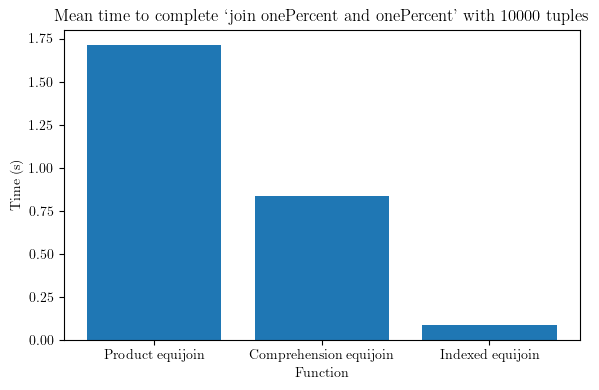

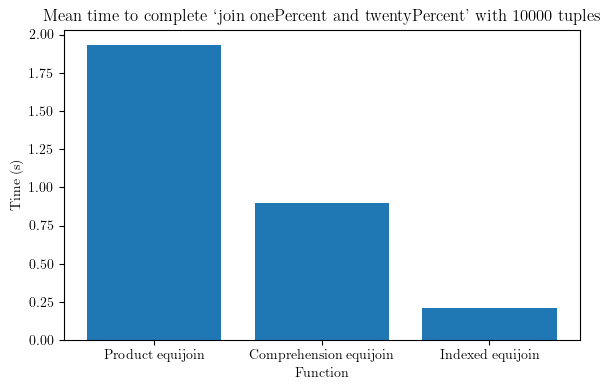

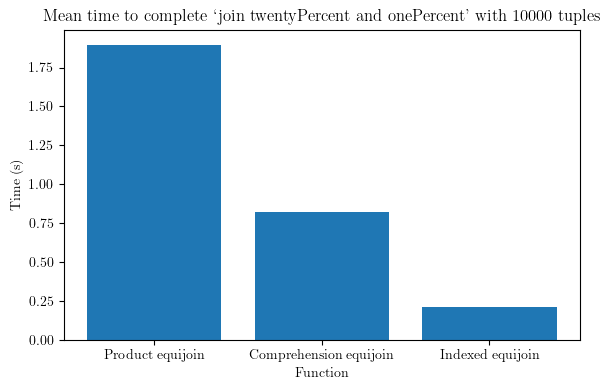

In [10]:
plotter = BenchmarkPlotter(benchmark)
for group_name in group_names:
    fig, ax = plt.subplots()
    plotter.plot_benchmark_group_means(ax, group_name)
    plt.savefig(generate_figure_path(f"{group_name}-{benchmark.get_tuple_count()}"))
plt.show()

In [11]:
benchmark.get_benchmark_mean('join onePercent and onePercent', 'Product equijoin')

1.71526960764586

In [12]:
print(benchmark.get_benchmark_mean('join onePercent and twentyPercent', 'Comprehension equijoin'))
print(benchmark.get_benchmark_mean('join twentyPercent and onePercent', 'Comprehension equijoin'))

0.8976544436042011
0.8217909584374651


## Teseting evaluation form

In [13]:
nf = benchmark
whnf = BenchmarkData.load_with_count(1000, path="../data/whnf/")

In [14]:
whnf_plotter = BenchmarkPlotter(whnf)
# whnf_plotter.plot_benchmark_group_means(ax, g

In [15]:
bg = list(whnf.get_benchmark_group_names())[0]
bg

'join evenOnePercent and oddOnePercent'

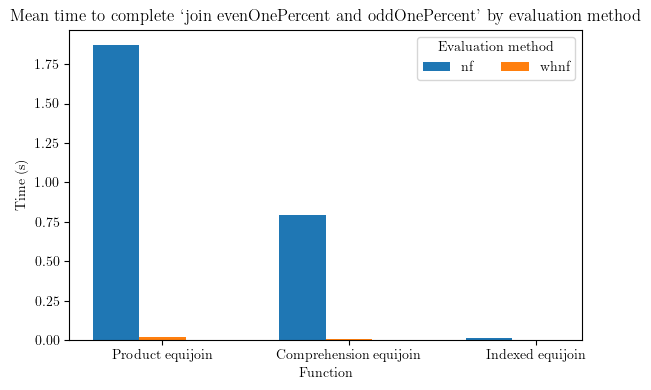

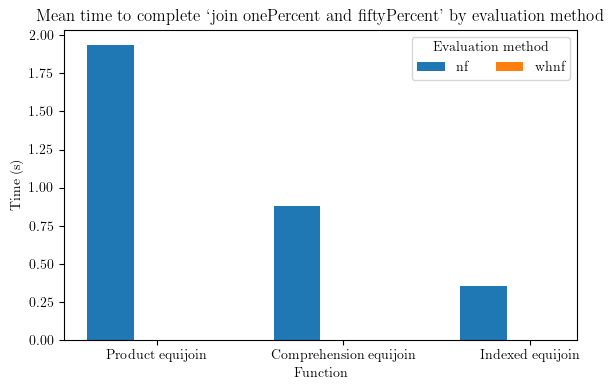

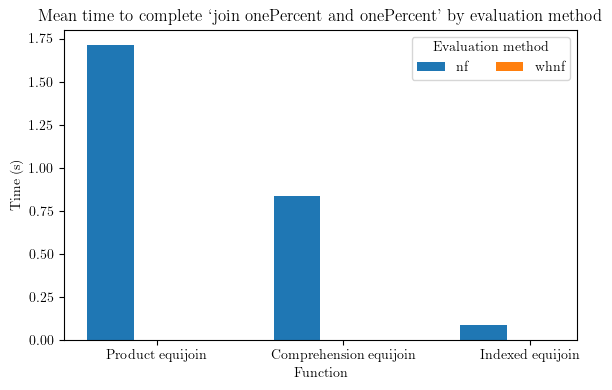

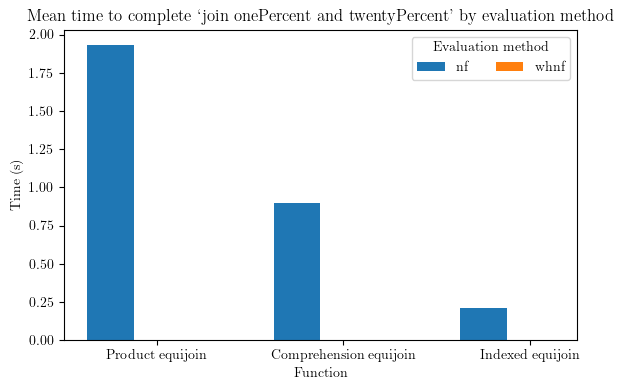

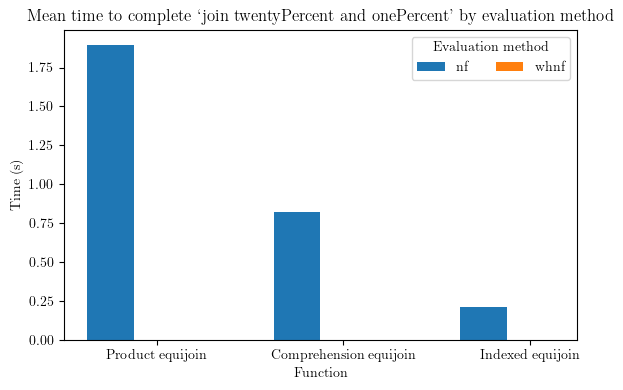

In [16]:
emp = EvaluationMethodPlotter(nf, whnf)

for group in nf.get_benchmark_group_names():
    fig, ax = plt.subplots()
    emp.plot_benchmark_group_means_comparison(ax, group)
    plt.savefig(generate_figure_path(f"eval-method-{group_name}"))
    plt.show()

## Testing difference with tuple count

In [17]:
xs = benchmarks.get_tuple_counts()
xs

[10,
 25,
 50,
 100,
 250,
 500,
 750,
 1000,
 2000,
 3000,
 4000,
 5000,
 6000,
 7000,
 8000,
 9000,
 10000]

In [18]:
benchmark.get_function_name_list()

['Product equijoin', 'Comprehension equijoin', 'Indexed equijoin']

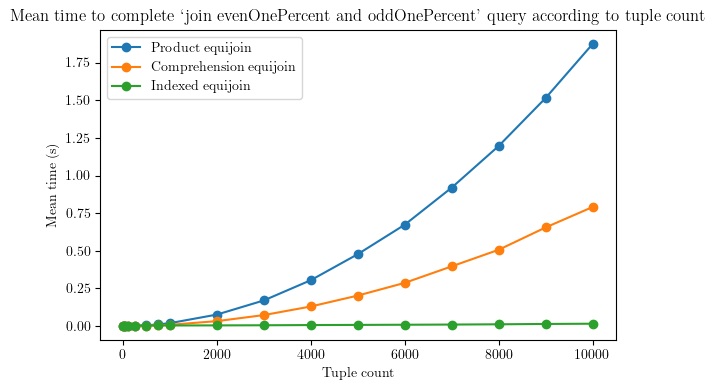

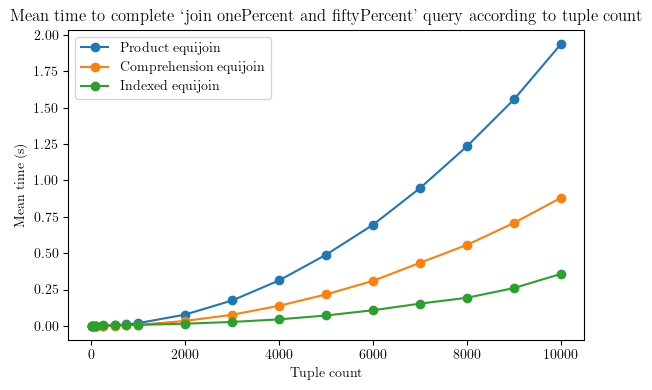

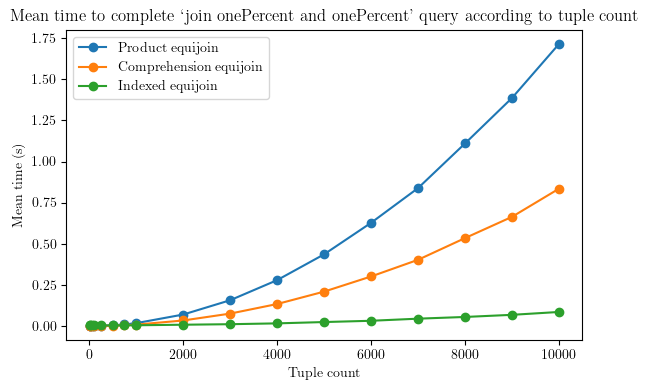

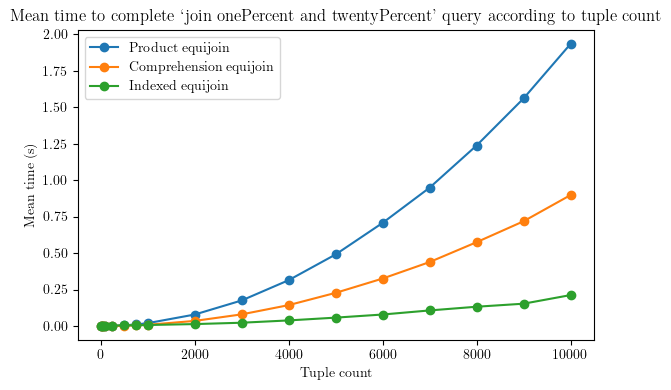

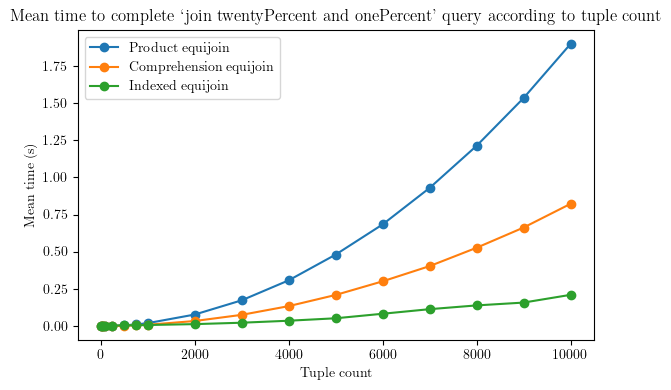

In [19]:
group_plotter: BenchmarkGroupPlotter = BenchmarkGroupPlotter(benchmarks)

groups = benchmark.get_benchmark_group_names()

for group in groups:
    fig, ax = plt.subplots()
    group_plotter.plot_mean_time_of_group_by_tuple_count(ax, group)
    plt.savefig(generate_figure_path(f"{group}-by-tuples"))

## Test with different counts

In [20]:
NUM_COUNT: int = 8
lesser_counts = sorted(benchmarks.get_tuple_counts())[:NUM_COUNT]
lesser_counts_group: BenchmarkGroup = benchmarks.make_subgroup_with_counts(lesser_counts)
lesser_counts_plotter: BenchmarkGroupPlotter = BenchmarkGroupPlotter(lesser_counts_group)

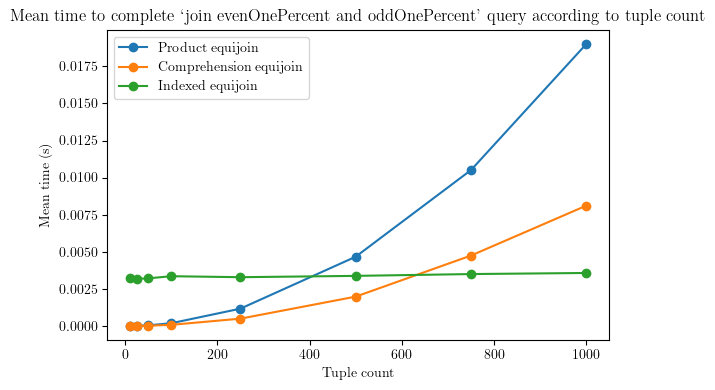

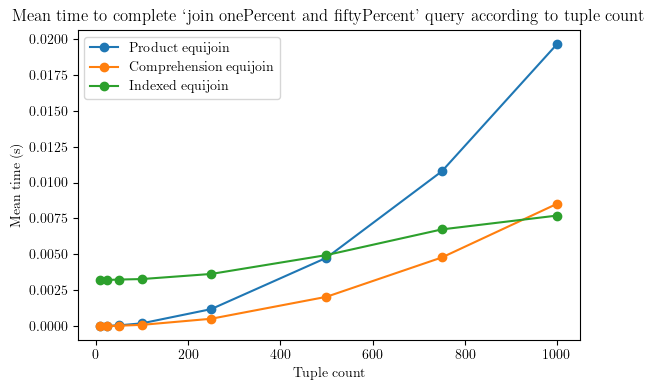

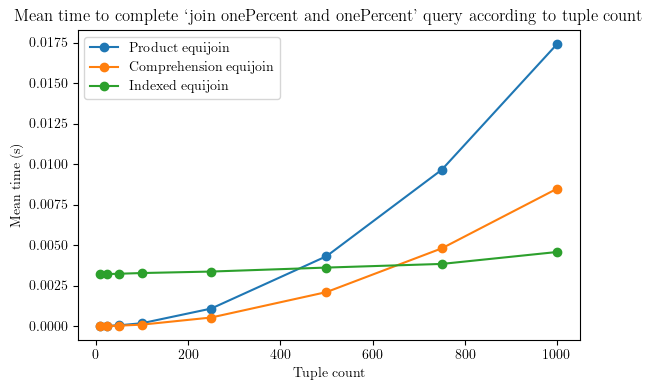

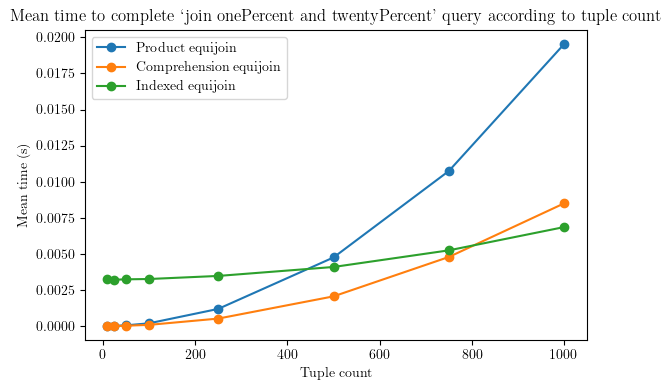

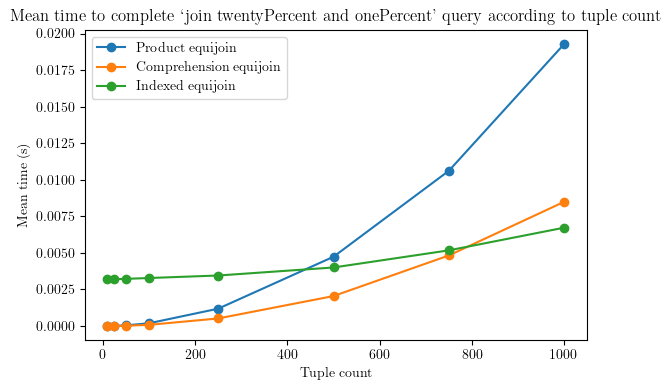

In [21]:
for group in groups:
    fig, ax = plt.subplots()
    lesser_counts_plotter.plot_mean_time_of_group_by_tuple_count(ax, group)
    plt.savefig(generate_figure_path(f"{group_name}-by-tuple-smallest"))

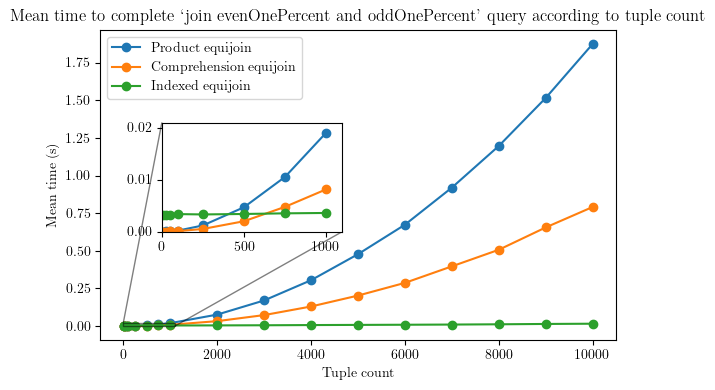

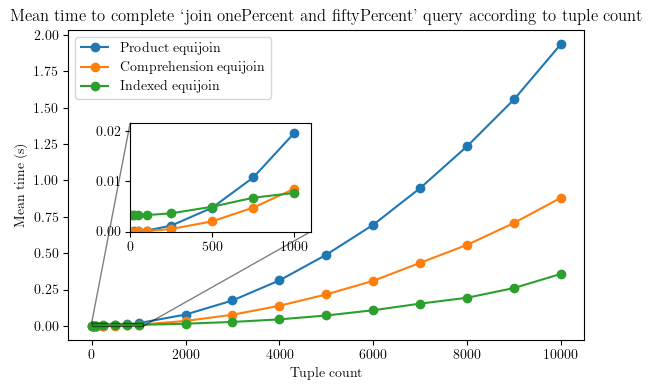

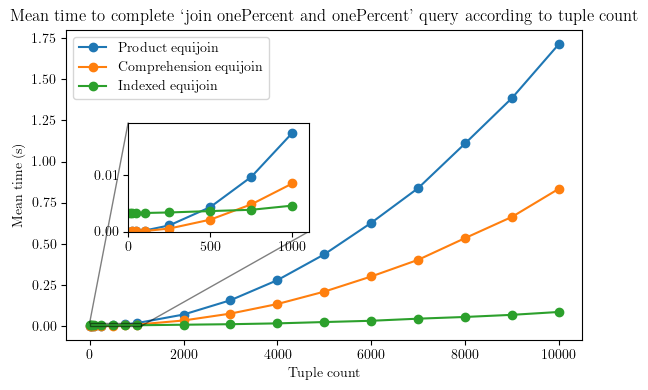

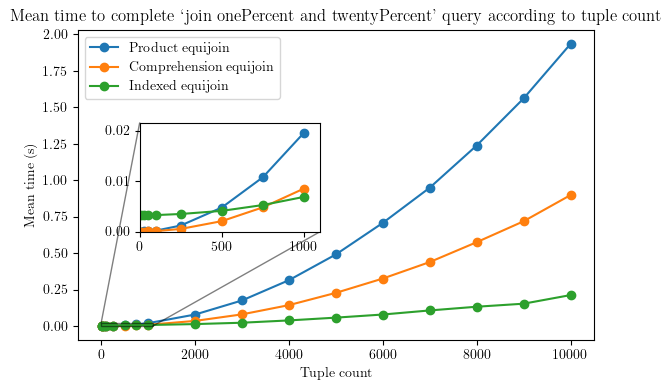

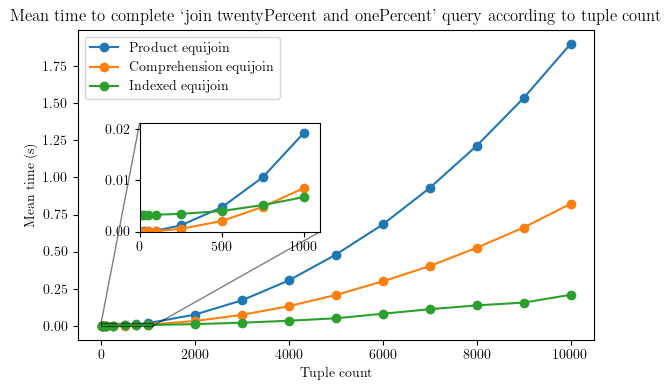

In [22]:
inset_axes_dimensions: List[float] = [0.12, 0.35, 0.35, 0.35]
for group in groups:
    fix, ax = plt.subplots()
    group_plotter.plot_mean_time_of_group_by_tuple_count_with_inset_axes(ax, group, NUM_COUNT, inset_axes_dimensions, 1.1)
    plt.savefig(generate_figure_path(f"{group}-by-tuple-with-inset"))

## Creating graphs for report

### Showing all groups for a benchmark

In [23]:
functions = benchmark.get_function_name_list()
functions

['Product equijoin', 'Comprehension equijoin', 'Indexed equijoin']

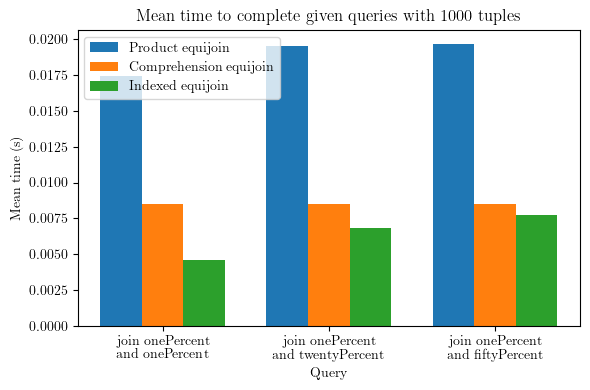

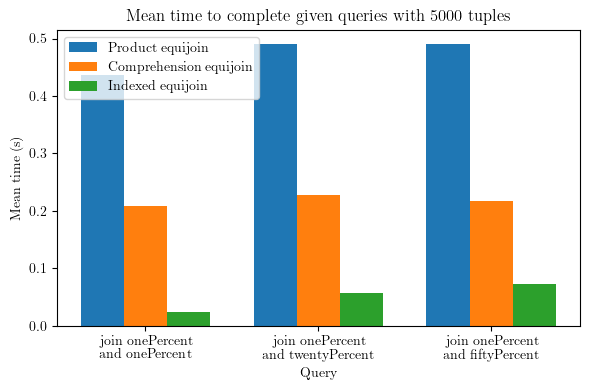

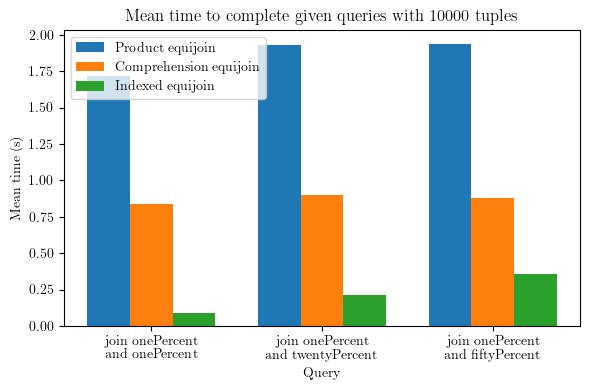

In [24]:
queries_to_display = ["join onePercent \nand onePercent", "join onePercent \nand twentyPercent", "join onePercent \nand fiftyPercent"]

for benchmark in benchmarks.get_list_of_benchmarks_with_counts([1000, 5000, 10000]):
    benchmark_plotter: BenchmarkPlotter = BenchmarkPlotter(benchmark)
    fig, ax = plt.subplots()
    benchmark_plotter.plot_given_queries(ax, queries_to_display)
    plt.savefig(generate_figure_path(f"onePercent joins with {benchmark.get_tuple_count()} tuples"))